In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import datetime

#**DATA LOADING AND INSPECTION**

In [63]:
df = pd.read_excel('Data/Online_Retail.xlsx')

In [64]:
print(f'This data has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

This data has 541909 rows and 8 columns.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [65]:
# cols = df.columns
# cols

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [67]:
numericalColumns = ['Quantity','UnitPrice']
df[numericalColumns].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#**DATA CLEANING AND PREPROCESSING**

In [68]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [69]:
df.dropna(inplace = True)
df.reset_index(inplace = True,drop = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [70]:
df.duplicated().sum()

np.int64(5225)

In [71]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True,drop = True)
df.duplicated().sum()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


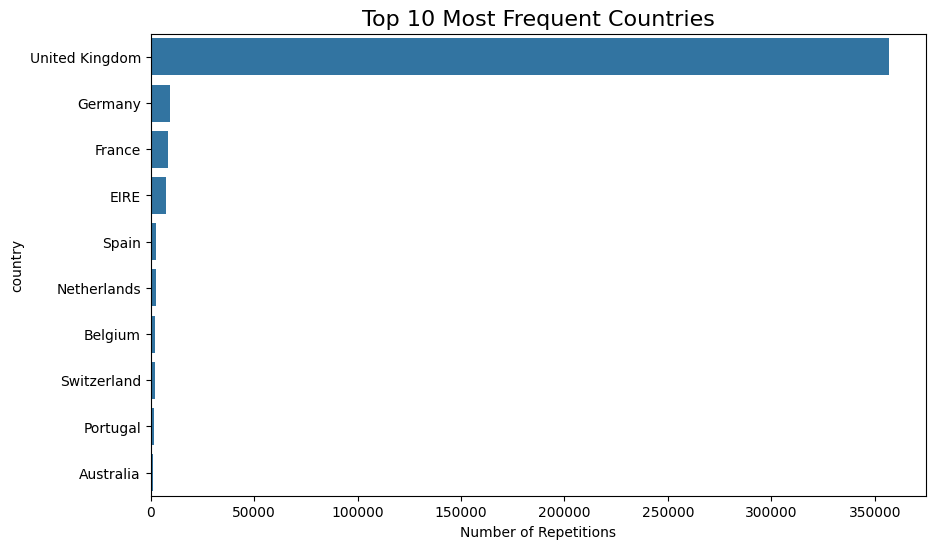

In [72]:
countryCount = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=countryCount.values, y=countryCount.index)
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()

In [73]:
#plt.figure(0)
#plt.grid(True)
# filtered_df = df.loc[(df['Quantity']>-20000) & (df['Quantity']<20000) & (df['UnitPrice']>-5000) & (df['UnitPrice']<20000)]
# plt.scatter(filtered_df['Quantity'], filtered_df['UnitPrice'])
# plt.scatter(df['Quantity']>-20000 and df['Quantity']<20000, df['UnitPrice']>-5000 and df['UnitPrice']<20000)
#plt.show()


# df = df.loc[(df['Quantity']>-4500) & (df['Quantity']<4500) & (df['UnitPrice']>-5000) & (df['UnitPrice']<10000)]

# # Scale the data
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df_scaled)

# # Predict the cluster labels
# labels = kmeans.predict(df_scaled)

# # Plot the scatter plot
# plt.scatter(df['Quantity'], df['UnitPrice'], c=labels)
# plt.xlabel('Quantity')
# plt.ylabel('UnitPrice')
# plt.title('K-Means Clustering on OnlineRetail Data')
# plt.show()

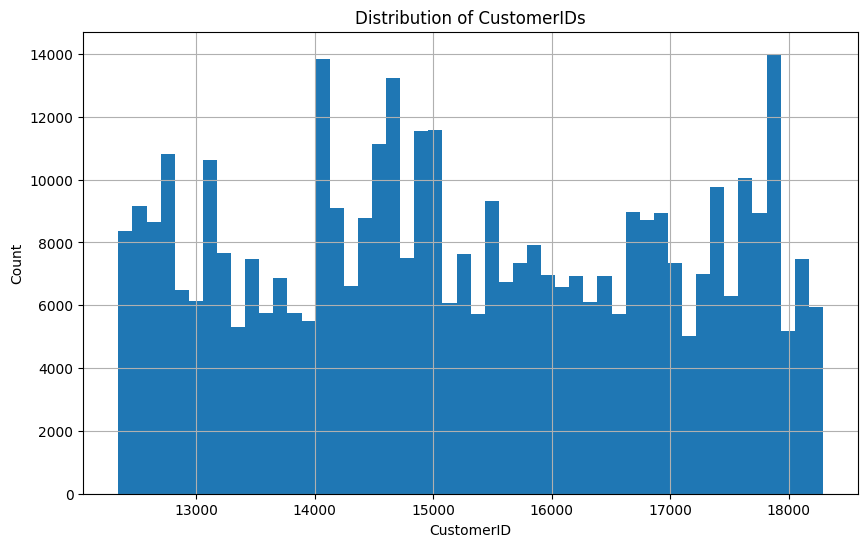

In [74]:
plt.figure(figsize=(10, 6))
df['CustomerID'].hist(bins=50)
plt.title('Distribution of CustomerIDs')
plt.xlabel('CustomerID')
plt.ylabel('Count')
plt.show()

#**LABEL ENCODING FOR CATEGORICAL COLUMNS**

In [75]:
new_df = df.copy()

In [76]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','Country']

for category in categories:
    
        new_df[category] = le.fit_transform(new_df[category].astype(str))
        
        
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,6,0,2.55,17850.0,35
1,0,2649,3724,6,0,3.39,17850.0,35
2,0,2855,861,8,0,2.75,17850.0,35
3,0,2803,1813,6,0,3.39,17850.0,35
4,0,2802,2776,6,0,3.39,17850.0,35
...,...,...,...,...,...,...,...,...
401599,18535,1470,2263,12,20459,0.85,12680.0,13
401600,18535,1746,695,6,20459,2.10,12680.0,13
401601,18535,2086,701,4,20459,4.15,12680.0,13
401602,18535,2087,700,4,20459,4.15,12680.0,13


In [77]:
new_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,9942.227495,1573.642655,2025.184943,12.183273,10883.785804,3.474064,15281.160818,32.803080
std,5546.858162,844.259117,1089.322247,250.283037,5966.497686,69.764035,1714.006089,6.772753
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,0.000000,12346.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,5635.000000,1.250000,13939.000000,35.000000
50%,10292.000000,1522.000000,1987.000000,5.000000,11427.000000,1.950000,15145.000000,35.000000
75%,14632.000000,2106.000000,2945.000000,12.000000,16127.250000,3.750000,16784.000000,35.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,20459.000000,38970.000000,18287.000000,36.000000


#**FEATURE ENGINEERING**

**RFM FEATURES**

In [78]:
# Check unique CustomerIDs before grouping
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique CustomerIDs: {unique_customers}")

Number of unique CustomerIDs: 4372


In [83]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # Day after the last invoice date
recency = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days})

frequency = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})

# Monetary: Sum the total spending for each customer
monetary = df.groupby('CustomerID').agg({'TotalPrice': 'sum'})

rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

rfm.columns = ['Recency', 'Frequency', 'Monetary']

print(rfm)


C:\Users\SUNIL BISHNOI\AppData\Local\Temp\ipykernel_70076\3888304015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\SUNIL BISHNOI\AppData\Local\Temp\ipykernel_70076\3888304015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


            Recency  Frequency  Monetary
CustomerID                              
12347.0           2          7   3643.58
12348.0          75          4    450.20
12349.0          19          1   1667.55
12350.0         310          1    334.40
12352.0          36         11   1545.41
...             ...        ...       ...
18280.0         278          1    180.60
18281.0         181          1     80.82
18282.0           8          3    162.68
18283.0           4         16   2045.53
18287.0          43          3    994.76

[4274 rows x 3 columns]


**HANDLING OUTLIERS**

In [80]:
q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)
iqr = q3 - q1      #interquartile range

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [81]:
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)


Upper limit: 27.0
Lower limit: -13.0


In [82]:
df[numericalColumns].describe()

,Quantity,UnitPrice
count,374895.000000,374895.000000
mean,6.879241,3.614527
std,6.772503,72.195519
min,-12.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,26.000000,38970.000000
